In [1]:
# import all important Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the data

df = pd.read_csv('churn_data.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

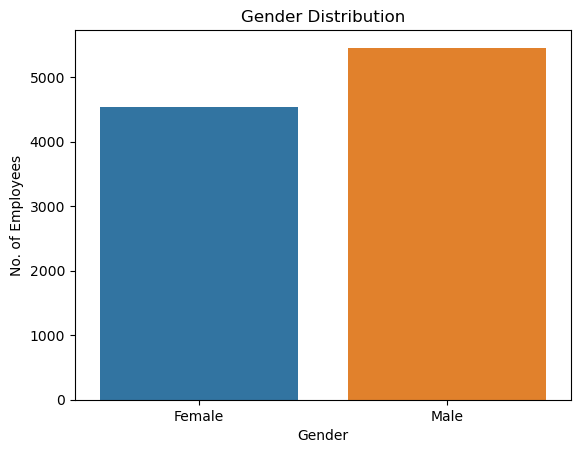

In [8]:
sns.countplot(df,x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('No. of Employees')
plt.show()

In [9]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

# One Hot Encoding

In [10]:
category_col = ['Geography','Gender']

In [11]:
ohe = pd.get_dummies(df[category_col],dtype=int)

In [12]:
ohe

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,1,0
1,0,0,1,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,0,0,1,1,0
...,...,...,...,...,...
9995,1,0,0,0,1
9996,1,0,0,0,1
9997,1,0,0,1,0
9998,0,1,0,0,1


In [13]:
df = pd.concat([df,ohe],axis=1)

In [14]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [15]:
df.drop(['Gender','Geography'],axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  int32  
 10  Geography_Germany  10000 non-null  int32  
 11  Geography_Spain    10000 non-null  int32  
 12  Gender_Female      10000 non-null  int32  
 13  Gender_Male        10000 non-null  int32  
dtypes: float64(2), int32(5), int64(7)
memory usage: 898.6 KB


In [17]:
# Feature Scaling

# Normalization

from sklearn.preprocessing import MinMaxScaler

In [18]:
continuous_col = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

In [19]:
mm = MinMaxScaler()

In [20]:
df[continuous_col]= mm.fit_transform(df[continuous_col])

In [21]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,2,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,0,1,1,0


<Axes: xlabel='Exited', ylabel='count'>

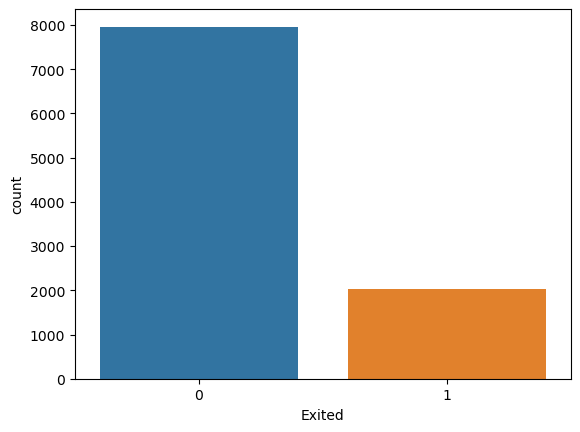

In [22]:
sns.countplot(df,x='Exited')

In [23]:
# Dependent and Independent Features

x= df.drop('Exited',axis=1)

In [24]:
y=df.Exited

In [25]:
# Handling Imbalance data

from imblearn.over_sampling import SMOTE

In [26]:
smt = SMOTE(sampling_strategy='minority')

In [27]:
x_sm,y_sm=smt.fit_resample(x,y)

In [28]:
y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [29]:
# Train Test Split

from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.30,random_state=42)

In [31]:
# Model Building

from sklearn.ensemble import GradientBoostingClassifier

In [32]:
# Gradient Boosting

gbc = GradientBoostingClassifier(n_estimators=220)

In [33]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=220)

In [34]:
y_predict_gbc = gbc.predict(x_test)

In [35]:
# Evaluation of Parameter

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [36]:
accuracy_score(y_test,y_predict_gbc)

0.8930514859773964

In [37]:
print(classification_report(y_test,y_predict_gbc))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      2426
           1       0.90      0.87      0.89      2352

    accuracy                           0.89      4778
   macro avg       0.89      0.89      0.89      4778
weighted avg       0.89      0.89      0.89      4778



In [38]:
confusion_matrix(y_test,y_predict_gbc)

array([[2210,  216],
       [ 295, 2057]], dtype=int64)

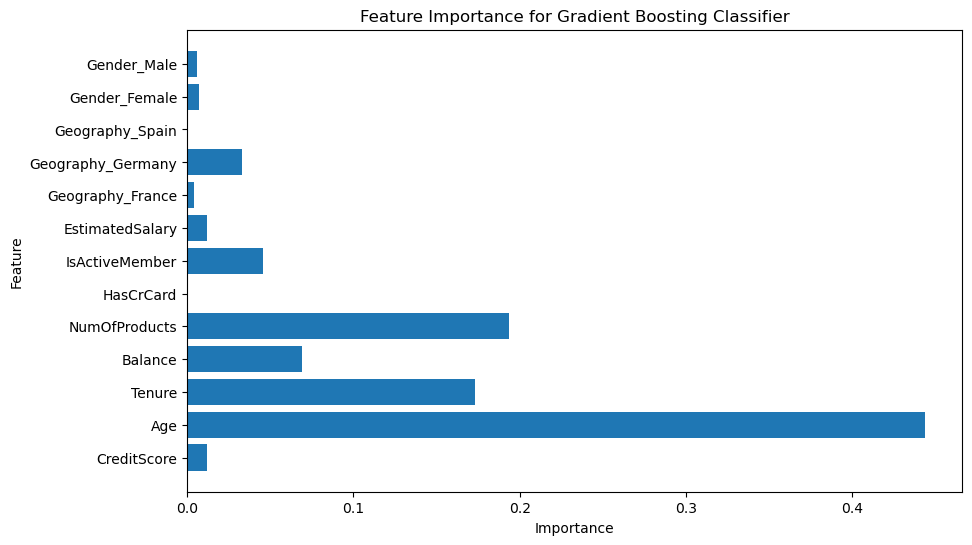

In [39]:
# Assuming gbc is the trained GradientBoostingClassifier
feature_importance = gbc.feature_importances_

# Plotting Feature Importance
plt.figure(figsize=(10,6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(x_train.columns)), x_train.columns)
plt.title('Feature Importance for Gradient Boosting Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()